In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Protein Intake and Resistance Training: Optimizing Muscle Hypertrophy

## The Problem
If you’ve ever tried to build muscle, you’ve probably asked yourself: how much protein should I eat? Advice usually ranges from 0.8 to 1 gram of protein per pound of body weight, but that quickly adds up. For someone weighing 250 pounds, that could mean over 250 grams of protein every single day—something that’s not realistic or affordable for most people. So the real question is: does eating that much protein actually help, or is there a point where extra protein doesn’t give extra results? What range of protein intake do diminishing returns begin? How much does bodyweight or lean body mass and protein intake affect muscle hypertrophy?

In this analysis, I will explore data on protein intake and resistance training to discover the optimal range of protein intake for muscle hypertrophy.

# The Data
The data I am using for this analysis comes from [Kaggle](https://www.kaggle.com/datasets/fgloblek/protein-intake-and-muscle-mass-data-pmc7727026), titled Protein intake and muscle mass data PMC7727026 by Fran Globlek. There are some important things to note about this dataset. The dataset comes from studies only involving resistance training from "the systematic review and meta-analysis <u>Tagawa R, Watanabe D, Ito K, Ueda K, Nakayama K, Sanbongi C, Miyachi M. Dose-response relationship between protein intake and muscle mass increase: a systematic review and meta-analysis of randomized controlled trials. Nutr Rev. 2020</u> that looked at the dose–response relationship of the effects of protein intake on lean body mass" (Globlek, Frank).

Firstly, what is a **meta-analysis**? A **meta-analysis** is essentially an analysis on a collection of studies, so in this case it was an analysis on a collection of studies on the relationship of protein intake and muscle mass increase with and without resistance training. However, I want to know about optimizing muscle **hypertrophy**, meaning muscle growth, and that includes resistance training. Thus this dataset only contains data from the studies involving resistance training.

The dataset contains 112 rows that are each individual studies, and the 68 columns indicate properties such as the study name, group type (control or experimental), race percentage, ages, LBM (lean body mass which is essentially muscle tissue) info, BMI (body mass index), and of course protein intake and more.

In [5]:
df = pd.read_csv("PMC7727026_full_data.csv")
len(df.columns)

68

In [6]:
df.head()

,Unnamed: 0,Author and Year,Percent male (%),Race with largest number,Age (years),Height (cm),Weight (kg),BMI (kg/m2),Health state,Frequency of exercise before intervention Other,...,Experimental energy intake (kcal/kg/day),Control energy intake (kcal/kg/day),Study Weight Percentage,Group,Energy intake (kcal/kg/day),Protein intake (g/kg/day),LBM change (kg),LBM change per week (kg/wk),Relative LBM change,Relative LBM change per week
0,0,Campbell (1995) [1],83,Caucasian,65.0,173.3,78.0,26.0,Healthy,Unclear,...,37.0,33.80,0.3,Experimental,37.0,2.40,1.8,0.150000,0.023077,0.001923
1,1,Rozenek (2002) [2],100,Caucasian,23.2,178.3,76.4,24.1,Healthy,High,...,63.3,58.10,0.5,Experimental,63.3,3.30,2.9,0.362500,0.037958,0.004745
2,2,Flakoll (2004) [3],100,Caucasian,18.9,177.0,74.9,23.4,Healthy,High,...,NaN,NaN,0.9,Experimental,NaN,NaN,-2.7,-0.337500,-0.036048,-0.004506
3,3,Rankin (2004) [4],100,Caucasian,20.8,177.5,78.9,25.1,Healthy,Unclear,...,33.3,32.94,0.6,Experimental,33.3,1.25,1.6,0.160000,0.020279,0.002028
4,4,Layman (2005) (with RT) [5],0,Caucasian,46.7,163.2,87.7,33.0,Healthy,Unclear,...,NaN,NaN,1.0,Experimental,NaN,NaN,-0.4,-0.023529,-0.004561,-0.000268


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 68 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Unnamed: 0                                                                   112 non-null    int64  
 1   Author and Year                                                              112 non-null    object 
 2   Percent male (%)                                                             112 non-null    int64  
 3   Race with largest number                                                     112 non-null    object 
 4   Age (years)                                                                  112 non-null    float64
 5   Height (cm)                                                                  110 non-null    float64
 6   Weight (kg)                               

In [8]:
df.describe(include='all')

,Unnamed: 0,Author and Year,Percent male (%),Race with largest number,Age (years),Height (cm),Weight (kg),BMI (kg/m2),Health state,Frequency of exercise before intervention Other,...,Experimental energy intake (kcal/kg/day),Control energy intake (kcal/kg/day),Study Weight Percentage,Group,Energy intake (kcal/kg/day),Protein intake (g/kg/day),LBM change (kg),LBM change per week (kg/wk),Relative LBM change,Relative LBM change per week
count,112.000000,112,112.000000,112,112.000000,110.000000,110.000000,112.000000,112,112,...,93.000000,93.000000,112.000000,112,93.000000,95.000000,112.000000,112.000000,110.000000,110.000000
unique,NaN,64,NaN,4,NaN,NaN,NaN,NaN,2,5,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Campbell (1995) [1],NaN,Caucasian,NaN,NaN,NaN,NaN,Healthy,Unclear,...,NaN,NaN,NaN,Experimental,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,98,NaN,NaN,NaN,NaN,105,51,...,NaN,NaN,NaN,64,NaN,NaN,NaN,NaN,NaN,NaN
mean,55.500000,NaN,68.473214,NaN,41.675000,173.035455,80.387273,26.760714,NaN,NaN,...,31.633548,29.736774,0.723214,NaN,30.849892,1.516211,1.150004,0.096473,0.014615,0.001220
std,32.475632,NaN,39.460314,NaN,19.825598,7.525804,8.958919,2.686850,NaN,NaN,...,7.569920,6.888310,0.239738,NaN,7.353709,0.573406,1.163011,0.148274,0.014926,0.001911
min,0.000000,NaN,0.000000,NaN,18.900000,155.500000,57.400000,22.600000,NaN,NaN,...,18.500000,17.300000,0.200000,NaN,17.300000,0.220000,-2.930000,-0.803500,-0.039119,-0.010158
25%,27.750000,NaN,40.750000,NaN,23.200000,170.000000,76.400000,24.800000,NaN,NaN,...,26.300000,24.800000,0.600000,NaN,26.160000,1.130000,0.600000,0.046074,0.007723,0.000616
50%,55.500000,NaN,100.000000,NaN,34.200000,173.500000,79.100000,26.200000,NaN,NaN,...,31.280000,29.400000,0.700000,NaN,29.560000,1.400000,1.180000,0.094167,0.014388,0.001186
75%,83.250000,NaN,100.000000,NaN,63.500000,178.500000,86.400000,28.600000,NaN,NaN,...,35.200000,32.980000,0.900000,NaN,34.200000,1.780000,1.825000,0.158750,0.023830,0.002051


In [9]:
df.shape

(112, 68)

In [10]:
df_null = df.isnull().sum()
df_null

Unnamed: 0                       0
Author and Year                  0
Percent male (%)                 0
Race with largest number         0
Age (years)                      0
                                ..
Protein intake (g/kg/day)       17
LBM change (kg)                  0
LBM change per week (kg/wk)      0
Relative LBM change              2
Relative LBM change per week     2
Length: 68, dtype: int64

In [11]:
df = df.drop(columns=['Unnamed: 0', 'Author and Year', 'Race with largest number', 'Health state',  'Frequency of exercise before intervention Other'])

In [12]:
df

,Percent male (%),Age (years),Height (cm),Weight (kg),BMI (kg/m2),Protein intake before intervention (g/kg/day),Protein intake before intervention (g/day),Protein intake during intervention (not include supplementation) (g/kg/day),Protein intake during intervention (not include supplementation) (g/day),Protein intake during intervention (include supplementation) (g/kg/day),...,Experimental energy intake (kcal/kg/day),Control energy intake (kcal/kg/day),Study Weight Percentage,Group,Energy intake (kcal/kg/day),Protein intake (g/kg/day),LBM change (kg),LBM change per week (kg/wk),Relative LBM change,Relative LBM change per week
0,83,65.0,173.3,78.0,26.0,NaN,NaN,NaN,NaN,0.80,...,37.00,33.80,0.3,Experimental,37.00,2.40,1.80,0.150000,0.023077,0.001923
1,100,23.2,178.3,76.4,24.1,NaN,NaN,1.48,115.4,1.70,...,63.30,58.10,0.5,Experimental,63.30,3.30,2.90,0.362500,0.037958,0.004745
2,100,18.9,177.0,74.9,23.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.9,Experimental,NaN,NaN,-2.70,-0.337500,-0.036048,-0.004506
3,100,20.8,177.5,78.9,25.1,1.25,98.7,1.25,98.6,NaN,...,33.30,32.94,0.6,Experimental,33.30,1.25,1.60,0.160000,0.020279,0.002028
4,0,46.7,163.2,87.7,33.0,0.88,77.0,NaN,NaN,NaN,...,NaN,NaN,1.0,Experimental,NaN,NaN,-0.40,-0.023529,-0.004561,-0.000268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0,67.6,155.8,62.3,25.7,0.83,51.8,NaN,NaN,0.87,...,27.66,26.70,1.1,Control,26.70,0.87,0.70,0.058333,0.011236,0.000936
108,0,64.4,161.5,80.1,30.8,0.79,61.6,NaN,NaN,0.73,...,23.60,21.76,1.0,Control,21.76,1.47,0.24,0.024000,0.002996,0.000300
109,45,20.8,170.2,73.1,25.2,NaN,NaN,2.20,154.3,NaN,...,35.40,32.76,0.3,Control,32.76,1.54,1.00,0.125000,0.013680,0.001710
110,100,24.2,186.6,79.9,22.9,1.45,112.4,NaN,NaN,1.70,...,45.04,43.20,0.7,Control,43.20,1.70,2.25,0.281250,0.028160,0.003520


In [13]:
df_clean = df.dropna(subset=["Protein intake (g/kg/day)", "Relative LBM change", "Relative LBM change per week"])
df_clean

,Percent male (%),Age (years),Height (cm),Weight (kg),BMI (kg/m2),Protein intake before intervention (g/kg/day),Protein intake before intervention (g/day),Protein intake during intervention (not include supplementation) (g/kg/day),Protein intake during intervention (not include supplementation) (g/day),Protein intake during intervention (include supplementation) (g/kg/day),...,Experimental energy intake (kcal/kg/day),Control energy intake (kcal/kg/day),Study Weight Percentage,Group,Energy intake (kcal/kg/day),Protein intake (g/kg/day),LBM change (kg),LBM change per week (kg/wk),Relative LBM change,Relative LBM change per week
0,83,65.0,173.3,78.0,26.0,NaN,NaN,NaN,NaN,0.80,...,37.00,33.80,0.3,Experimental,37.00,2.40,1.80,0.150000,0.023077,0.001923
1,100,23.2,178.3,76.4,24.1,NaN,NaN,1.48,115.4,1.70,...,63.30,58.10,0.5,Experimental,63.30,3.30,2.90,0.362500,0.037958,0.004745
3,100,20.8,177.5,78.9,25.1,1.25,98.7,1.25,98.6,NaN,...,33.30,32.94,0.6,Experimental,33.30,1.25,1.60,0.160000,0.020279,0.002028
5,100,64.8,174.0,86.7,28.6,NaN,NaN,1.26,107.5,NaN,...,28.80,28.28,0.4,Experimental,28.80,1.26,0.94,0.078333,0.010842,0.000903
6,100,64.8,174.0,86.7,28.6,NaN,NaN,1.40,122.5,NaN,...,26.60,26.08,0.4,Experimental,26.60,1.40,0.71,0.059167,0.008189,0.000682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,41,62.5,169.3,92.5,32.3,0.95,86.0,NaN,NaN,0.84,...,23.40,21.40,0.8,Control,21.40,1.64,0.20,0.020000,0.002162,0.000216
107,0,67.6,155.8,62.3,25.7,0.83,51.8,NaN,NaN,0.87,...,27.66,26.70,1.1,Control,26.70,0.87,0.70,0.058333,0.011236,0.000936
108,0,64.4,161.5,80.1,30.8,0.79,61.6,NaN,NaN,0.73,...,23.60,21.76,1.0,Control,21.76,1.47,0.24,0.024000,0.002996,0.000300
109,45,20.8,170.2,73.1,25.2,NaN,NaN,2.20,154.3,NaN,...,35.40,32.76,0.3,Control,32.76,1.54,1.00,0.125000,0.013680,0.001710


In [14]:
df_clean.isnull().sum()

Percent male (%)                0
Age (years)                     0
Height (cm)                     0
Weight (kg)                     0
BMI (kg/m2)                     0
                               ..
Protein intake (g/kg/day)       0
LBM change (kg)                 0
LBM change per week (kg/wk)     0
Relative LBM change             0
Relative LBM change per week    0
Length: 63, dtype: int64

In [15]:
for col in df_clean.columns:
    print(f"{col}")

Percent male (%)
Age (years)
Height (cm)
Weight (kg)
BMI (kg/m2)
Protein intake before intervention (g/kg/day)
Protein intake before intervention (g/day)
Protein intake during intervention (not include supplementation) (g/kg/day)
Protein intake during intervention (not include supplementation) (g/day)
Protein intake during intervention (include supplementation) (g/kg/day)
Protein intake during intervention (include supplementation) (g/day)
Energy intake before intervention (g/kg/day)
Energy intake before intervention (g/day)
Energy intake during intervention (not include supplementation) (g/kg/day)
Energy intake during intervention (not include supplementation) (g/day)
Energy intake during intervention (include supplementation) (g/kg/day)
Energy intake during intervention (include supplementation) (g/day)
Assigned protein amount (g/kg/dose)
Assigned protein amount (g/dose)
Assigned protein amount (g/kg/exercise day)
Assigned protein amount (g/exercise day)
Assigned protein amount (g/kg

## Preprocessing
The first thing I did was identify what kind of data (data types like string/objects, ints, floats) that I have. Then I identified which columns were not relevant and dropped those such as health state and and index numbers and majority race. I also searched for rows with null values and removed those to only use studies with sufficient data.

Also the units are in metric, so for some of the data I have processed them in pounds, such as lean body mass or bodyweight.

# Understanding and Visualizing the Data

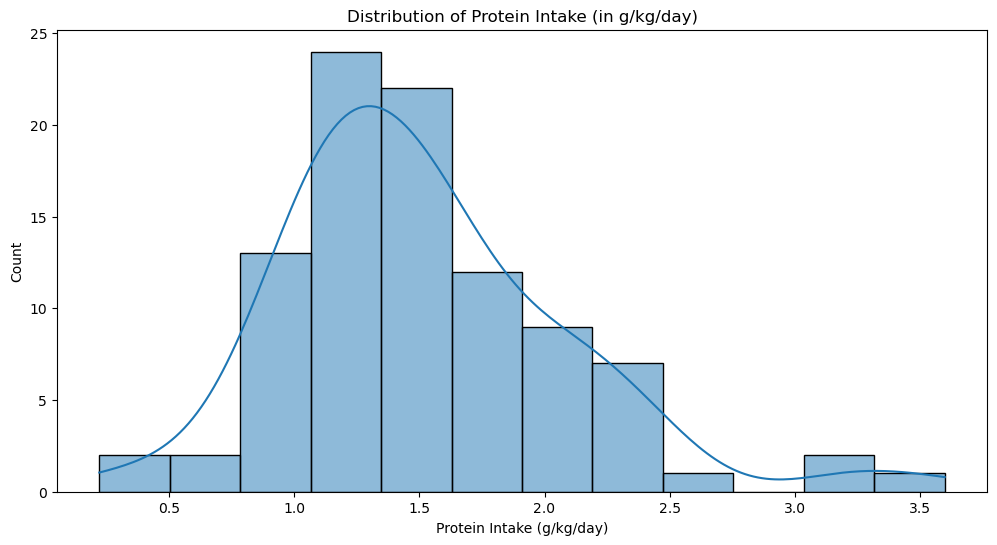

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(df_clean["Protein intake (g/kg/day)"], kde=True)
plt.xlabel("Protein Intake (g/kg/day)")
plt.title("Distribution of Protein Intake (in g/kg/day)")
plt.show()

In [17]:
df_clean["Protein intake (g/lb/day)"] = df_clean["Protein intake (g/kg/day)"] / 2.20462

C:\Users\adria\AppData\Local\Temp\ipykernel_77980\3456253267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Protein intake (g/lb/day)"] = df_clean["Protein intake (g/kg/day)"] / 2.20462


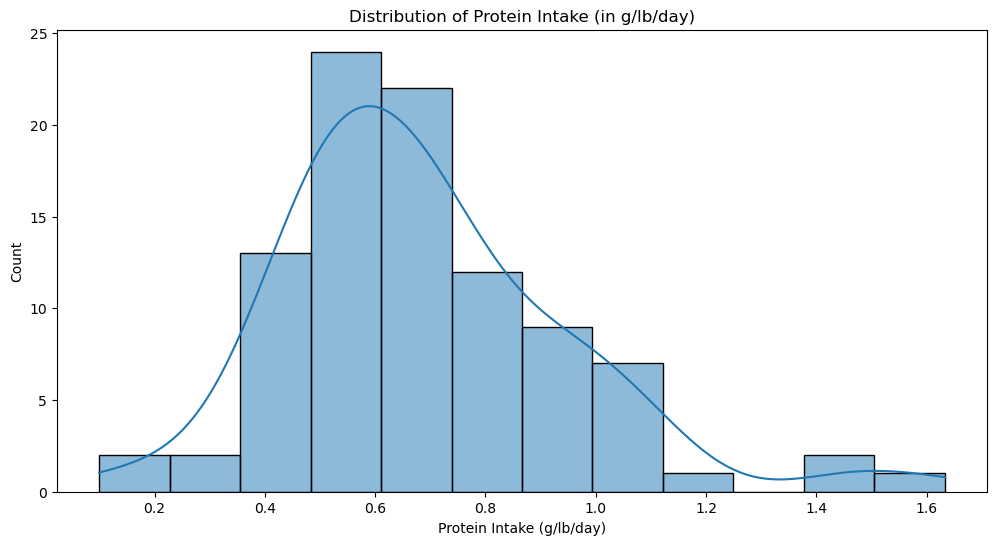

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(df_clean["Protein intake (g/lb/day)"], kde=True)
plt.xlabel("Protein Intake (g/lb/day)")
plt.title("Distribution of Protein Intake (in g/lb/day)")
plt.show()

In these last two figures, we can see the amount of protein consumed by the participants of the studies. We see that most of them consumed about .4 to 1 gram of protein per lb of bodyweight per day, but one thing to understand is that .4 grams of protein for someone who is 300 lbs is 120 lbs, whereas 1 g/lb/day for someone who is 120 lbs is also 120 grams.

The next things I want to see is, in general, the relationship between lean body mass and protein intake. Then I need to circle back and determine how much protein the participants are consuming based on their bodyweight and examine how it affects people of different sizes.

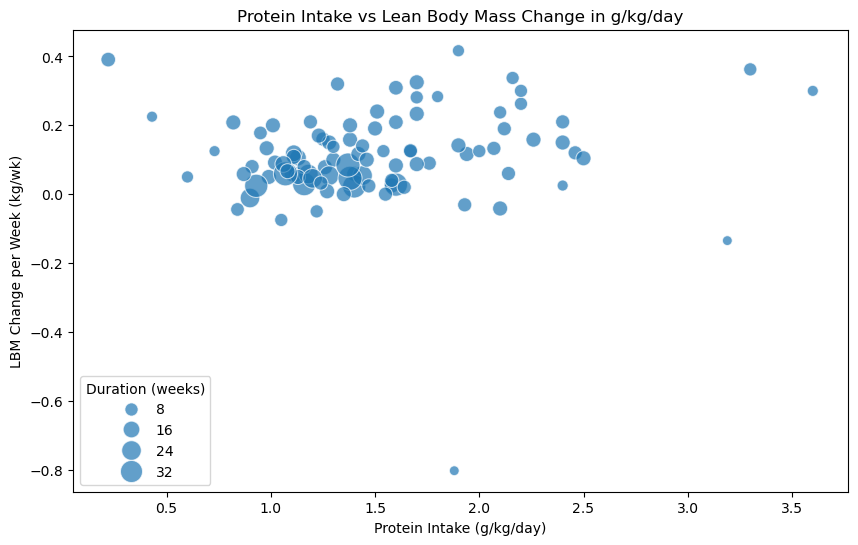

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_clean,
    x="Protein intake (g/kg/day)",
    y="LBM change per week (kg/wk)",
    size="Duration (weeks)",  
    sizes=(50, 300),  
    alpha=0.7
)
plt.xlabel("Protein Intake (g/kg/day)")
plt.ylabel("LBM Change per Week (kg/wk)")
plt.title("Protein Intake vs Lean Body Mass Change in g/kg/day")
plt.show()

C:\Users\adria\AppData\Local\Temp\ipykernel_77980\2984340323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["LBM change per week (lb/wk)"] = df_clean["LBM change per week (kg/wk)"] * 2.20462


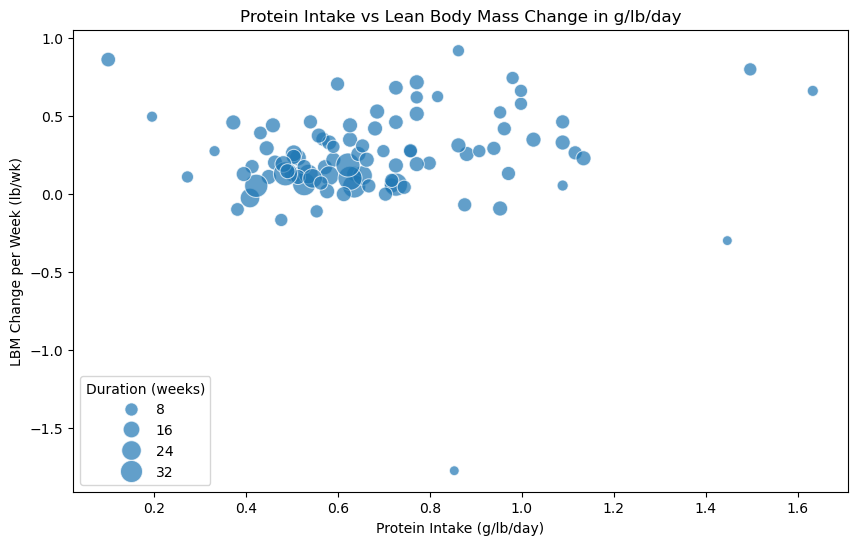

In [20]:
df_clean["LBM change per week (lb/wk)"] = df_clean["LBM change per week (kg/wk)"] * 2.20462

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_clean,
    x="Protein intake (g/lb/day)",
    y="LBM change per week (lb/wk)",
    size="Duration (weeks)",  
    sizes=(50, 300),
    alpha=0.7
)
plt.xlabel("Protein Intake (g/lb/day)")
plt.ylabel("LBM Change per Week (lb/wk)")
plt.title("Protein Intake vs Lean Body Mass Change in g/lb/day")
plt.show()

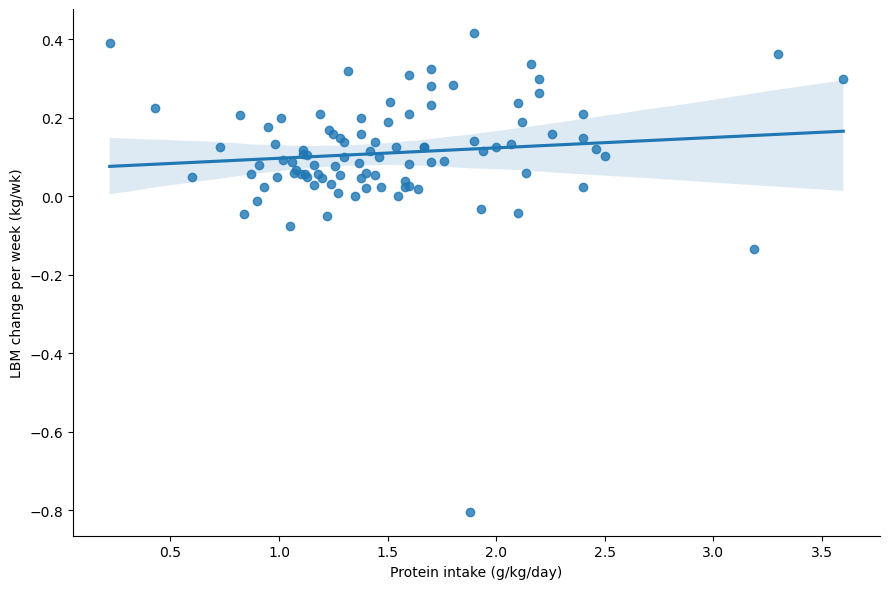

In [21]:
sns.lmplot(
    data=df_clean,
    x="Protein intake (g/kg/day)",
    y="LBM change per week (kg/wk)",
    height=6, aspect=1.5
)
